# Week 1: Data Exploration - AirFly Insights

**Objective:** Understand and explore the airline flights dataset

**Tasks:**
- Load CSV data using pandas
- Explore schema, types, size, and nulls
- Perform sampling and memory optimizations
- Document findings for preprocessing

---

## 1. Setup and Imports

In [4]:
%pip install pandas numpy matplotlib seaborn plotly folium scipy kaggle tqdm openpyxl

  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached kaggle-2.0.0-py3-none-any.whl.metadata (15 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.1-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached narwhals-2.16.0-py3-none-any.whl.metadata (14 kB)
  Using cached bleach-6.3.0-py3-none-any.whl.metadata (31 kB)
  Using cached kagglesdk-0.1.15-py3-n

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'e:\\Developments\\AirFly Insights\\venv\\Lib\\site-packages\\narwhals\\sql.py'
Check the permissions.


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached notebook-7.5.3-py3-none-any.whl.metadata (10 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached kaggle-2.0.0-py3-none-any.whl.metadata (15 kB)
  Using cached tqdm-4.67.3-py3-none-any.whl.metadata (57 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Project modules
import sys
sys.path.append('..')
from src.config import RAW_DATA_DIR, SAMPLES_DATA_DIR, EXPECTED_COLUMNS, DELAY_COLUMNS
from src.data_loader import load_sample_data, get_memory_usage, get_data_summary, optimize_dataframe_dtypes
from src.utils import setup_plotting_style, print_section_header, calculate_delay_metrics

# Setup plotting
setup_plotting_style()
%matplotlib inline

print("✓ Imports successful")
print(f"Raw data directory: {RAW_DATA_DIR}")

✓ Imports successful
Raw data directory: e:\Developments\AirFly Insights\notebooks\..\data\raw


## 2. Data Loading

**Note:** Before running this section, ensure you have downloaded the Kaggle Airlines dataset and placed the CSV file(s) in the `data/raw/` directory.

### 2.1 List Available Data Files

In [3]:
# List all CSV files in raw data directory
csv_files = list(RAW_DATA_DIR.glob('*.csv'))

if not csv_files:
    print("⚠️  No CSV files found in data/raw/ directory")
    print("\nPlease download the dataset from Kaggle and place it in:")
    print(f"  {RAW_DATA_DIR}")
else:
    print(f"Found {len(csv_files)} CSV file(s):\n")
    for file in csv_files:
        size_mb = file.stat().st_size / (1024**2)
        print(f"  • {file.name} ({size_mb:.2f} MB)")

Found 1 CSV file(s):

  • Airline Dataset Updated - v2.csv (12.11 MB)


### 2.2 Load Sample Data

We'll load a sample of 1 million rows for initial exploration to manage memory.

In [4]:
# Update this with your actual CSV filename
DATA_FILE = RAW_DATA_DIR / 'Airline Dataset Updated - v2.csv'  # Change this to match your file

# Load sample data
if DATA_FILE.exists():
    df_sample = load_sample_data(DATA_FILE, sample_size=1_000_000)
    print(f"\n✓ Loaded sample: {len(df_sample):,} rows × {len(df_sample.columns)} columns")
else:
    print(f"⚠️  File not found: {DATA_FILE}")
    print("Please update DATA_FILE variable with the correct filename")

Loading sample of 1,000,000 rows from: Airline Dataset Updated - v2.csv
Total rows in file: 98,619
Sampled 98,619 rows

✓ Loaded sample: 98,619 rows × 15 columns


## 3. Initial Data Exploration

### 3.1 Dataset Overview

In [5]:
print_section_header("DATASET OVERVIEW")

print(f"Shape: {df_sample.shape[0]:,} rows × {df_sample.shape[1]} columns\n")

print("Column Names:")
for i, col in enumerate(df_sample.columns, 1):
    print(f"  {i:2d}. {col}")


                      DATASET OVERVIEW                      

Shape: 98,619 rows × 15 columns

Column Names:
   1. Passenger ID
   2. First Name
   3. Last Name
   4. Gender
   5. Age
   6. Nationality
   7. Airport Name
   8. Airport Country Code
   9. Country Name
  10. Airport Continent
  11. Continents
  12. Departure Date
  13. Arrival Airport
  14. Pilot Name
  15. Flight Status


In [6]:
# Display first few rows
print("\nFirst 5 rows:")
df_sample.head()


First 5 rows:


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-IsÃ¨re Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [7]:
# Display last few rows
print("Last 5 rows:")
df_sample.tail()

Last 5 rows:


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,CÃ´te d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled
98618,8JYEcz,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Auguste Tindley,Delayed


### 3.2 Data Types and Schema

In [8]:
print_section_header("DATA TYPES")

print(df_sample.dtypes)
print(f"\nData type distribution:")
print(df_sample.dtypes.value_counts())


                         DATA TYPES                         

Passenger ID              str
First Name                str
Last Name                 str
Gender                    str
Age                     int64
Nationality               str
Airport Name              str
Airport Country Code      str
Country Name              str
Airport Continent         str
Continents                str
Departure Date            str
Arrival Airport           str
Pilot Name                str
Flight Status             str
dtype: object

Data type distribution:
str      14
int64     1
Name: count, dtype: int64


### 3.3 Comprehensive Data Summary

In [9]:
# Get detailed summary
summary = get_data_summary(df_sample)
summary

,dtype,non_null,null_count,null_pct,unique,memory_mb
Age,int64,98619.0,0.0,0.0,90.0,0.75
Airport Continent,str,98619.0,0.0,0.0,6.0,4.84
Airport Country Code,str,98619.0,0.0,0.0,235.0,4.80
Airport Name,str,98619.0,0.0,0.0,9062.0,6.92
Arrival Airport,str,98619.0,0.0,0.0,9024.0,4.89
Continents,str,98619.0,0.0,0.0,6.0,5.44
Country Name,str,98619.0,0.0,0.0,235.0,5.60
Departure Date,str,98619.0,0.0,0.0,364.0,5.51
First Name,str,98619.0,0.0,0.0,8437.0,5.17
Flight Status,str,98619.0,0.0,0.0,3.0,5.33


### 3.4 Missing Values Analysis

In [10]:
print_section_header("MISSING VALUES ANALYSIS")

# Calculate missing values
missing = pd.DataFrame({
    'Missing Count': df_sample.isnull().sum(),
    'Missing %': (df_sample.isnull().sum() / len(df_sample) * 100).round(2)
})

# Filter to columns with missing values
missing = missing[missing['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if len(missing) > 0:
    print(missing)
    
    # Visualize missing values
    fig, ax = plt.subplots(figsize=(10, 6))
    missing['Missing %'].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Missing %')
    ax.set_title('Missing Values by Column')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found!")


                  MISSING VALUES ANALYSIS                   

✓ No missing values found!


## 4. Memory Optimization

### 4.1 Current Memory Usage

In [11]:
print_section_header("MEMORY USAGE - BEFORE OPTIMIZATION")

mem_before = get_memory_usage(df_sample, detailed=True)

print(f"Total Memory: {mem_before['total_mb']:.2f} MB")
print(f"Rows: {mem_before['rows']:,}")
print(f"Columns: {mem_before['columns']}")
print(f"Memory per row: {mem_before['mb_per_row']:.6f} MB\n")

print("Top 10 memory-consuming columns:")
top_cols = pd.Series(mem_before['column_breakdown']).head(10)
for col, mb in top_cols.items():
    print(f"  {col:30s}: {mb:8.2f} MB")


             MEMORY USAGE - BEFORE OPTIMIZATION             

Total Memory: 75.99 MB
Rows: 98,619
Columns: 15
Memory per row: 0.000771 MB

Top 10 memory-consuming columns:
  Airport Name                  :     6.92 MB
  Pilot Name                    :     5.93 MB
  Country Name                  :     5.60 MB
  Departure Date                :     5.51 MB
  Continents                    :     5.44 MB
  Flight Status                 :     5.33 MB
  Nationality                   :     5.31 MB
  Last Name                     :     5.27 MB
  Passenger ID                  :     5.17 MB
  First Name                    :     5.17 MB


### 4.2 Apply Optimization

In [12]:
# Create optimized copy
df_optimized = optimize_dataframe_dtypes(df_sample)

print("✓ Optimization applied")

✓ Optimization applied


### 4.3 Compare Memory Usage


             MEMORY USAGE - AFTER OPTIMIZATION              

Total Memory: 75.99 MB
Memory per row: 0.000771 MB

💾 Memory Savings: 0.00 MB (0.0% reduction)


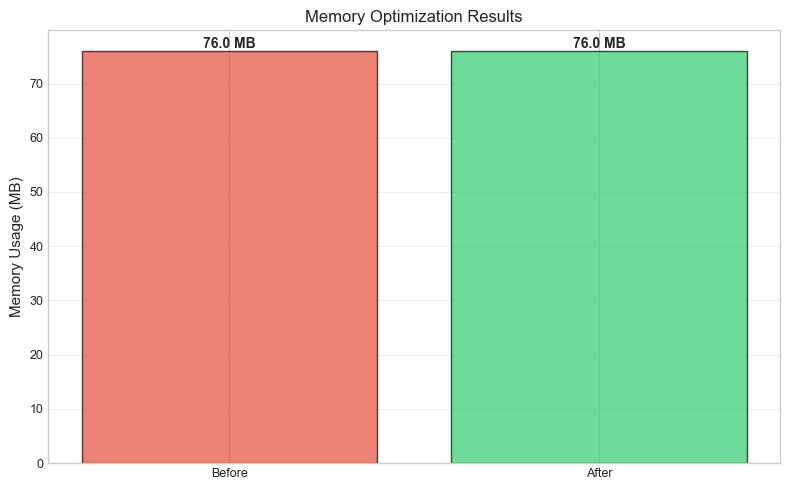

In [13]:
print_section_header("MEMORY USAGE - AFTER OPTIMIZATION")

mem_after = get_memory_usage(df_optimized)

print(f"Total Memory: {mem_after['total_mb']:.2f} MB")
print(f"Memory per row: {mem_after['mb_per_row']:.6f} MB\n")

# Calculate savings
savings_mb = mem_before['total_mb'] - mem_after['total_mb']
savings_pct = (savings_mb / mem_before['total_mb']) * 100

print(f"💾 Memory Savings: {savings_mb:.2f} MB ({savings_pct:.1f}% reduction)")

# Visualize comparison
fig, ax = plt.subplots(figsize=(8, 5))
categories = ['Before', 'After']
memory = [mem_before['total_mb'], mem_after['total_mb']]
colors = ['#e74c3c', '#2ecc71']

bars = ax.bar(categories, memory, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Memory Usage (MB)')
ax.set_title('Memory Optimization Results')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f} MB', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Descriptive Statistics

### 5.1 Numerical Columns

In [14]:
print_section_header("DESCRIPTIVE STATISTICS - NUMERICAL")

df_optimized.describe()


             DESCRIPTIVE STATISTICS - NUMERICAL             



,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


### 5.2 Categorical Columns

In [15]:
print_section_header("DESCRIPTIVE STATISTICS - CATEGORICAL")

categorical_cols = df_optimized.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df_optimized[col].nunique()}")
    print(f"  Top 5 values:")
    print(df_optimized[col].value_counts().head())


            DESCRIPTIVE STATISTICS - CATEGORICAL            


Passenger ID:
  Unique values: 98619
  Top 5 values:
Passenger ID
ABVWIg    1
jkXXAX    1
CdUz2g    1
BRS38V    1
9kvTLo    1
Name: count, dtype: int64

First Name:
  Unique values: 8437
  Top 5 values:
First Name
Gale       37
Brett      36
Gerrie     35
Conny      35
Haleigh    35
Name: count, dtype: int64

Last Name:
  Unique values: 41658
  Top 5 values:
Last Name
Dyball       17
Capron       15
Ducker       13
Richfield    12
Danaher      11
Name: count, dtype: int64

Gender:
  Unique values: 2
  Top 5 values:
Gender
Male      49598
Female    49021
Name: count, dtype: int64

Nationality:
  Unique values: 240
  Top 5 values:
Nationality
China          18317
Indonesia      10559
Russia          5693
Philippines     5239
Brazil          3791
Name: count, dtype: int64

Airport Name:
  Unique values: 9062
  Top 5 values:
Airport Name
San Pedro Airport       43
Santa Maria Airport     38
BÃ¶blingen Flugfeld     36
Santa Ana

## 6. Initial Visualizations

### 6.1 Temporal Distribution

In [16]:
# Flights by month
if 'MONTH' in df_optimized.columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    month_counts = df_optimized['MONTH'].value_counts().sort_index()
    month_counts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Flights')
    ax.set_title('Flight Distribution by Month')
    ax.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

### 6.2 Top Airlines

In [17]:
# Top 10 airlines by flight count
if 'AIRLINE' in df_optimized.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    top_airlines = df_optimized['AIRLINE'].value_counts().head(10)
    top_airlines.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
    ax.set_xlabel('Number of Flights')
    ax.set_ylabel('Airline')
    ax.set_title('Top 10 Airlines by Flight Count')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### 6.3 Delay Distribution

In [18]:
# Arrival delay distribution
if 'ARRIVAL_DELAY' in df_optimized.columns:
    delays = df_optimized['ARRIVAL_DELAY'].dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(delays, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Arrival Delay (minutes)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Arrival Delay Distribution')
    axes[0].grid(alpha=0.3)
    axes[0].axvline(0, color='red', linestyle='--', label='On-time')
    axes[0].legend()
    
    # Box plot
    axes[1].boxplot(delays, vert=True)
    axes[1].set_ylabel('Arrival Delay (minutes)')
    axes[1].set_title('Arrival Delay Box Plot')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate delay metrics
    delay_metrics = calculate_delay_metrics(df_optimized)
    print("\nDelay Metrics:")
    for key, value in delay_metrics.items():
        print(f"  {key}: {value}")

## 7. Key Findings Summary

### 7.1 Dataset Characteristics

In [19]:
print_section_header("KEY FINDINGS")

print("📊 DATASET CHARACTERISTICS")
print(f"  • Sample size: {len(df_optimized):,} rows")
print(f"  • Number of columns: {len(df_optimized.columns)}")
print(f"  • Memory usage: {mem_after['total_mb']:.2f} MB")
print(f"  • Date range: {df_optimized['YEAR'].min() if 'YEAR' in df_optimized.columns else 'N/A'}")

print("\n🔍 DATA QUALITY")
if len(missing) > 0:
    print(f"  • Columns with missing values: {len(missing)}")
    print(f"  • Highest missing %: {missing['Missing %'].max():.2f}% ({missing.index[0]})")
else:
    print("  • No missing values detected")

if 'AIRLINE' in df_optimized.columns:
    print(f"\n✈️  AIRLINES")
    print(f"  • Unique airlines: {df_optimized['AIRLINE'].nunique()}")
    print(f"  • Top airline: {df_optimized['AIRLINE'].value_counts().index[0]}")

if 'ORIGIN_AIRPORT' in df_optimized.columns:
    print(f"\n🛫 AIRPORTS")
    print(f"  • Unique origin airports: {df_optimized['ORIGIN_AIRPORT'].nunique()}")
    print(f"  • Unique destination airports: {df_optimized['DESTINATION_AIRPORT'].nunique() if 'DESTINATION_AIRPORT' in df_optimized.columns else 'N/A'}")

if 'CANCELLED' in df_optimized.columns:
    cancellation_rate = df_optimized['CANCELLED'].mean() * 100
    print(f"\n⚠️  CANCELLATIONS")
    print(f"  • Cancellation rate: {cancellation_rate:.2f}%")


                        KEY FINDINGS                        

📊 DATASET CHARACTERISTICS
  • Sample size: 98,619 rows
  • Number of columns: 15
  • Memory usage: 75.99 MB
  • Date range: N/A

🔍 DATA QUALITY
  • No missing values detected


### 7.2 Preprocessing Recommendations

In [20]:
print_section_header("PREPROCESSING RECOMMENDATIONS FOR WEEK 2")

print("1. Handle Missing Values")
if len(missing) > 0:
    for col in missing.index[:5]:
        print(f"   • {col}: {missing.loc[col, 'Missing %']:.2f}% missing")
else:
    print("   • No missing values to handle")

print("\n2. Create Derived Features")
print("   • Extract hour from departure/arrival times")
print("   • Create route column (origin-destination)")
print("   • Add time period categories (morning/afternoon/evening/night)")
print("   • Create season from month")
print("   • Add weekend indicator")

print("\n3. Data Type Conversions")
print("   • Convert time columns to datetime format")
print("   • Ensure categorical columns are properly typed")

print("\n4. Data Validation")
print("   • Check for logical inconsistencies (e.g., arrival before departure)")
print("   • Validate delay cause columns sum to total delay")
print("   • Remove duplicate records if any")

print("\n5. Save Preprocessed Data")
print("   • Save cleaned data in optimized format (parquet recommended)")
print("   • Create separate samples for quick testing")


          PREPROCESSING RECOMMENDATIONS FOR WEEK 2          

1. Handle Missing Values
   • No missing values to handle

2. Create Derived Features
   • Extract hour from departure/arrival times
   • Create route column (origin-destination)
   • Add time period categories (morning/afternoon/evening/night)
   • Create season from month
   • Add weekend indicator

3. Data Type Conversions
   • Convert time columns to datetime format
   • Ensure categorical columns are properly typed

4. Data Validation
   • Check for logical inconsistencies (e.g., arrival before departure)
   • Validate delay cause columns sum to total delay
   • Remove duplicate records if any

5. Save Preprocessed Data
   • Save cleaned data in optimized format (parquet recommended)
   • Create separate samples for quick testing


## 8. Save Sample Data

Save the optimized sample for quick access in future notebooks.

In [21]:
# Save optimized sample
sample_path = SAMPLES_DATA_DIR / 'sample_1M_optimized.csv'
df_optimized.to_csv(sample_path, index=False)

print(f"✓ Sample data saved to: {sample_path}")
print(f"  Size: {sample_path.stat().st_size / (1024**2):.2f} MB")

✓ Sample data saved to: e:\Developments\AirFly Insights\notebooks\..\data\samples\sample_1M_optimized.csv
  Size: 12.13 MB


---

## Week 1 Deliverables Checklist

- [x] Project structure created
- [x] Dependencies installed
- [x] Dataset loaded and explored
- [x] Schema and data types documented
- [x] Missing values analyzed
- [x] Memory optimization implemented
- [x] Initial visualizations created
- [x] Preprocessing recommendations documented
- [x] Sample data saved for reuse

**Next Steps:** Proceed to Week 2 - Data Cleaning and Feature Engineering

---